# Riemann Problem

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import kuibit
from kuibit.simdir import SimDir
from kuibit.grid_data import UniformGrid

# Exact Solution

In [87]:
#initial data from the Exact Riemann solver of https://www.brunogiacomazzo.org/?page_id=395
exact = np.loadtxt("Sod_exact.dat")

In [88]:
x_exact=exact[:,0]
rho_exact=exact[:,1]
press_exact=exact[:,2] #note: this is pgas+pmag
vx_exact=exact[:,3]
vy_exact=exact[:,4]
vz_exact=exact[:,5]
By_exact=exact[:,6]
Bz_exact=exact[:,7]

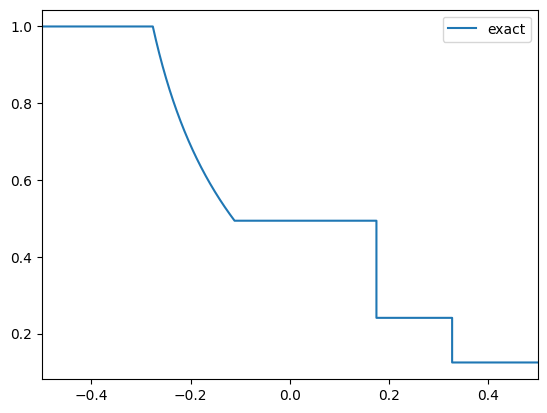

In [89]:
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()

# Read the Numerical Results

# 400

In [90]:
gf= SimDir("/home/giulia/simulations/Sod400").gf
print(gf)


Available grid data of dimension 1D (x): 
['rho', 'scon[1]', 'press', 'vel[0]', 'vel[2]', 'tau', 'scon[0]', 'eps', 'dens', 'scon[2]', 'vel[1]', 'w_lorentz']


Available grid data of dimension 1D (y): 
['tau', 'vel[1]', 'scon[0]', 'rho', 'dens', 'scon[1]', 'w_lorentz', 'vel[0]', 'eps', 'press', 'vel[2]', 'scon[2]']


Available grid data of dimension 1D (z): 
['dens', 'vel[2]', 'scon[0]', 'tau', 'vel[1]', 'scon[1]', 'eps', 'press', 'rho', 'vel[0]', 'w_lorentz', 'scon[2]']


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
[]



In [91]:
vars1d=gf.x
#to select the variable that I want: vars1d.fields.(name of the variable)
rho=vars1d.fields.rho

### Kuibit Standard Methods for Plots

We create a uniform grid and plot the data on it. Kuibit indeed assumes that data were produced on a grid with several meshes (AMR). In our case the grid was already uniform, so later we will see an alternative way to plot the data without interpolating them on a new grid.

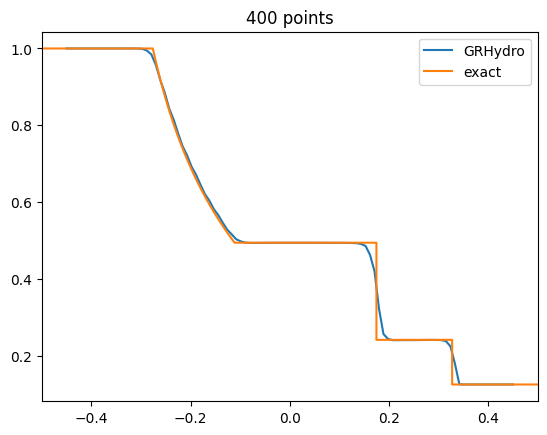

In [92]:
small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45])
rho_final = rho.read_on_grid(rho.iterations[-1], small_grid)
plt.plot(*rho_final.coordinates_meshgrid(), rho_final.data_xyz, label="GRHydro")
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.title('400 points')
plt.legend()
plt.savefig('/home/giulia/einstein_toolkit/images/SOD/400.png', dpi=200)
plt.show()

### Alternative Method
This method can only be used with simulations that used only one refinement level (i.e., a uniform grid) and using only 1 MPI process.

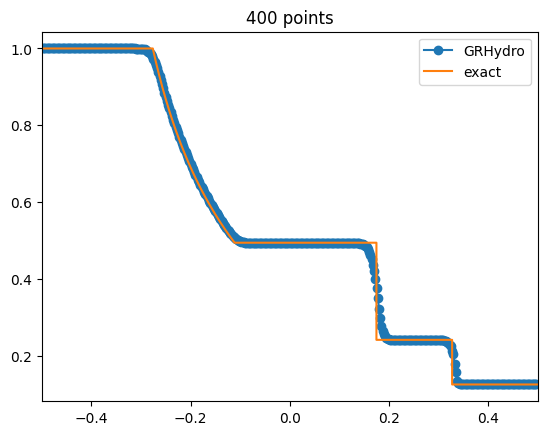

In [93]:
#rho[iterazione][refinement level][component number]
plt.plot(rho[rho.iterations[-1]][0][0].coordinates()[0].data,rho[rho.iterations[-1]][0][0].data, label="GRHydro", marker='o')
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.title('400 points')
plt.legend()
plt.show()

## 500

In [94]:
gf= SimDir("/home/giulia/simulations/Sod500").gf
print(gf)


Available grid data of dimension 1D (x): 
['rho', 'scon[1]', 'press', 'vel[0]', 'vel[2]', 'tau', 'scon[0]', 'eps', 'dens', 'scon[2]', 'vel[1]', 'w_lorentz']


Available grid data of dimension 1D (y): 
['tau', 'vel[1]', 'scon[0]', 'rho', 'dens', 'scon[1]', 'w_lorentz', 'vel[0]', 'eps', 'press', 'vel[2]', 'scon[2]']


Available grid data of dimension 1D (z): 
['dens', 'vel[2]', 'scon[0]', 'tau', 'vel[1]', 'scon[1]', 'eps', 'press', 'rho', 'vel[0]', 'w_lorentz', 'scon[2]']


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
[]



In [95]:
vars1d=gf.x
rho=vars1d.fields.rho

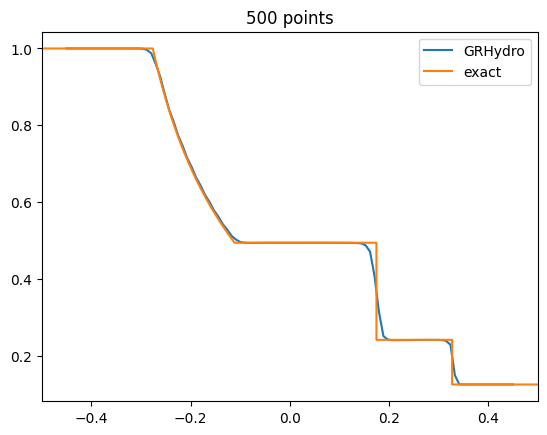

In [96]:
#plot metohd 1
small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45])
rho_final = rho.read_on_grid(rho.iterations[-1], small_grid)

plt.plot(*rho_final.coordinates_meshgrid(), rho_final.data_xyz, label="GRHydro")
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.title('500 points')
plt.legend()
plt.savefig('/home/giulia/einstein_toolkit/images/SOD/500.png', dpi=200)
plt.show()

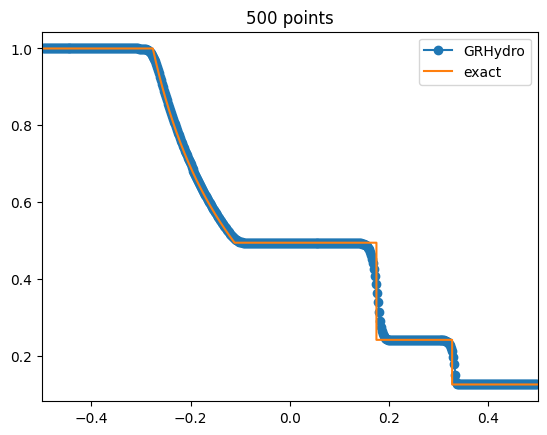

In [97]:
#plot method 2
plt.plot(rho[rho.iterations[-1]][0][0].coordinates()[0].data,rho[rho.iterations[-1]][0][0].data, label="GRHydro", marker='o')
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.title('500 points')
plt.show()

## 1000

In [98]:
gf= SimDir("/home/giulia/simulations/Sod1000").gf
print(gf)


Available grid data of dimension 1D (x): 
['rho', 'scon[1]', 'press', 'vel[0]', 'vel[2]', 'tau', 'scon[0]', 'eps', 'dens', 'scon[2]', 'vel[1]', 'w_lorentz']


Available grid data of dimension 1D (y): 
['tau', 'vel[1]', 'scon[0]', 'rho', 'dens', 'scon[1]', 'w_lorentz', 'vel[0]', 'eps', 'press', 'vel[2]', 'scon[2]']


Available grid data of dimension 1D (z): 
['dens', 'vel[2]', 'scon[0]', 'tau', 'vel[1]', 'scon[1]', 'eps', 'press', 'rho', 'vel[0]', 'w_lorentz', 'scon[2]']


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
[]



In [99]:
vars1d=gf.x
rho=vars1d.fields.rho

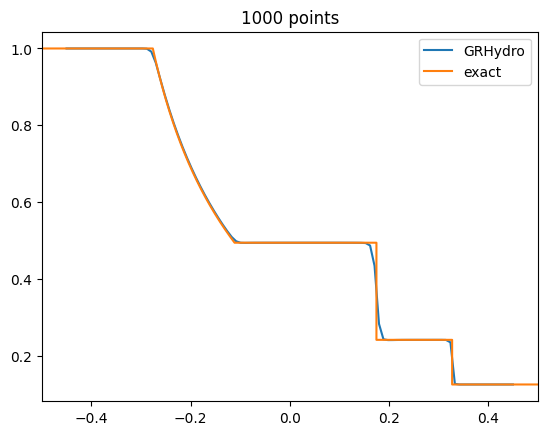

In [100]:
#plot metohd 1
small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45])
rho_final = rho.read_on_grid(rho.iterations[-1], small_grid)

plt.plot(*rho_final.coordinates_meshgrid(), rho_final.data_xyz, label="GRHydro")
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.title('1000 points')
plt.legend()
plt.savefig('/home/giulia/einstein_toolkit/images/SOD/1000.png', dpi=200)
plt.show()

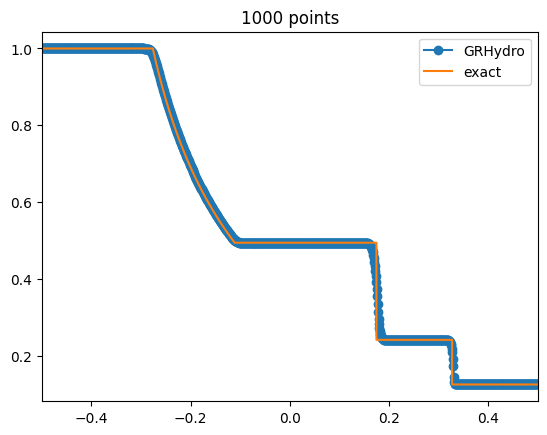

In [101]:
#plot method 2
plt.plot(rho[rho.iterations[-1]][0][0].coordinates()[0].data,rho[rho.iterations[-1]][0][0].data, label="GRHydro", marker='o')
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.title('1000 points')
plt.show()

## 200

In [102]:
gf= SimDir("/home/giulia/simulations/Sod200").gf
print(gf)


Available grid data of dimension 1D (x): 
['rho', 'scon[1]', 'press', 'vel[0]', 'vel[2]', 'tau', 'scon[0]', 'eps', 'dens', 'scon[2]', 'vel[1]', 'w_lorentz']


Available grid data of dimension 1D (y): 
['tau', 'vel[1]', 'scon[0]', 'rho', 'dens', 'scon[1]', 'w_lorentz', 'vel[0]', 'eps', 'press', 'vel[2]', 'scon[2]']


Available grid data of dimension 1D (z): 
['dens', 'vel[2]', 'scon[0]', 'tau', 'vel[1]', 'scon[1]', 'eps', 'press', 'rho', 'vel[0]', 'w_lorentz', 'scon[2]']


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
[]



In [103]:
vars1d=gf.x
rho=vars1d.fields.rho

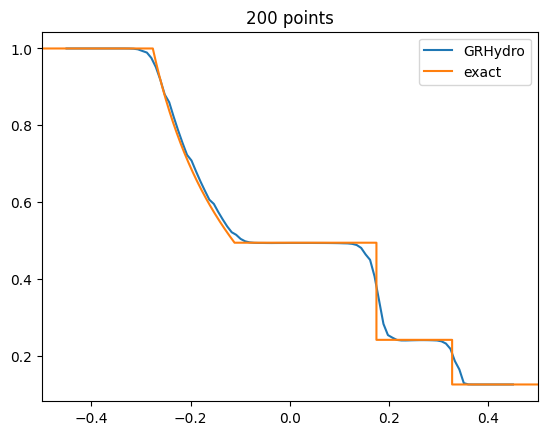

In [104]:
#plot metohd 1
small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45])
rho_final = rho.read_on_grid(rho.iterations[-1], small_grid)

plt.plot(*rho_final.coordinates_meshgrid(), rho_final.data_xyz, label="GRHydro")
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.legend()
plt.title('200 points')
plt.savefig('/home/giulia/einstein_toolkit/images/SOD/200.png', dpi=200)
plt.show()

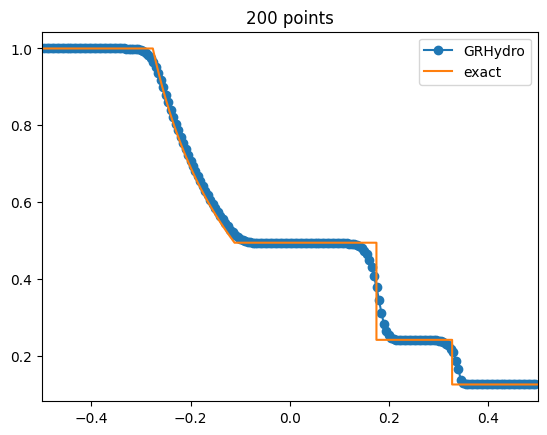

In [105]:
#plot method 2
plt.plot(rho[rho.iterations[-1]][0][0].coordinates()[0].data,rho[rho.iterations[-1]][0][0].data, label="GRHydro", marker='o')
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.title('200 points')
plt.show()